# Amazon top 50 bestselling books

Source : [Kaggle.io](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

Dataset contains for each year from 2009 to 2019, the Top 50 best-selling books for that respective year. 
There are a total of 550 entries.

## Objective: Perform Exploratory Data Analysis

__Index__

1. Data Import and Initial Overview

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### 1. Data Import and Initial Overview

#### 1.1 Data Import

In [2]:
books = pd.read_csv('books.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### 1.2 Initial Overview

In [3]:
# Sorting dataset on Year and Book Name
books.sort_values(by = ['Year','Name'], inplace = True)
books.reset_index(inplace = True)
books.head(10)

,index,Name,Author,User Rating,Reviews,Price,Year,Genre
0,14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,25,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,38,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,50,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,60,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
5,72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
6,78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction
7,80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
8,91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009,Non Fiction
9,92,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.3,956,14,2009,Non Fiction


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        550 non-null    int64  
 1   Name         550 non-null    object 
 2   Author       550 non-null    object 
 3   User Rating  550 non-null    float64
 4   Reviews      550 non-null    int64  
 5   Price        550 non-null    int64  
 6   Year         550 non-null    int64  
 7   Genre        550 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 34.5+ KB


In [5]:
print("Missing Values \n", books.isnull().sum())

Missing Values 
 index          0
Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [6]:
print("Duplicate entries", books.duplicated().sum())

Duplicate entries 0


__Note:__
1. There are no missing values or duplicate entries.
2. Out of 7 variables, 4 are numerical and 3 are text type.

### 2. Summary of Data

In [7]:
books.describe()

,index,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000,550.000000
mean,274.500000,4.618364,11953.281818,13.100000,2014.000000
std,158.915596,0.226980,11731.132017,10.842262,3.165156
min,0.000000,3.300000,37.000000,0.000000,2009.000000
25%,137.250000,4.500000,4058.000000,7.000000,2011.000000
50%,274.500000,4.700000,8580.000000,11.000000,2014.000000
75%,411.750000,4.800000,17253.250000,16.000000,2017.000000
max,549.000000,4.900000,87841.000000,105.000000,2019.000000


In [8]:
books['Genre'].value_counts()/550

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

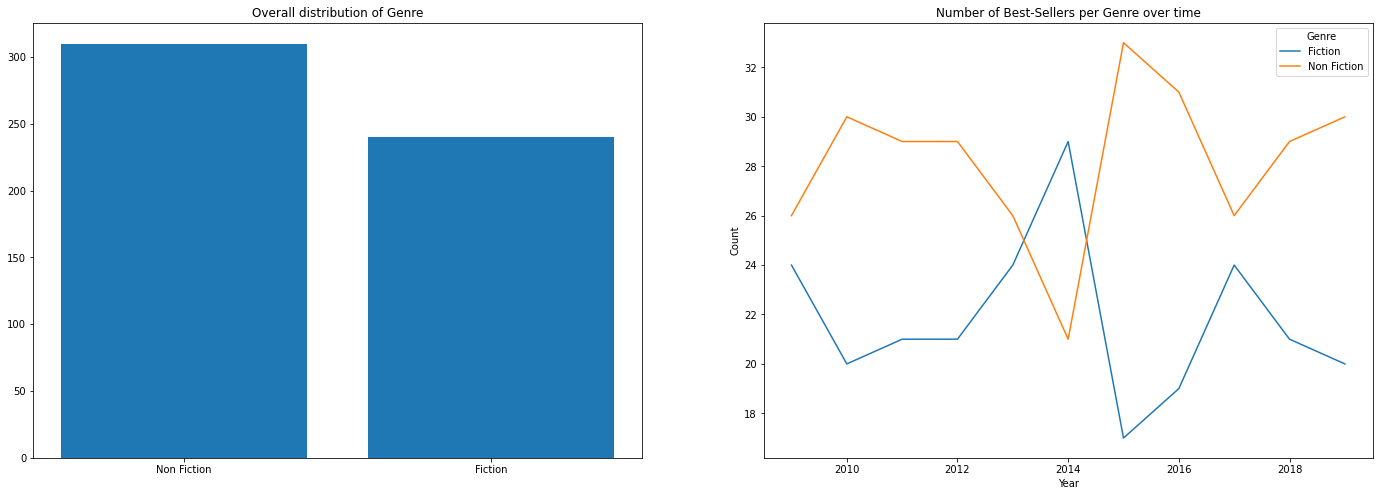

In [9]:
# Distribution of Genre
table = books.groupby(['Year','Genre']).aggregate({'Year':'count'})
table.rename(columns={'Year':'Year','Genre':'Genre','Year':'Count'}, inplace = True)

fig, ax = plt.subplots(1, 2, figsize=(24,8))
# Bar Plot
ax[0].bar(height = books['Genre'].value_counts(), x = pd.unique(books['Genre']))
ax[0].set_title('Overall distribution of Genre')
# Line Plot
sns.lineplot(data = table, x = 'Year', y = 'Count', hue = 'Genre')
ax[1].set_title('Number of Best-Sellers per Genre over time')
plt.show()

__Note:__
1. From 2009 - 2019, Non-Fiction(56.3%) books have more often been on the best-selling list than Non-Fiction(43.6%)
2. Post 2017, we see that Non-Fction books have more often been on the Best-Selling list.

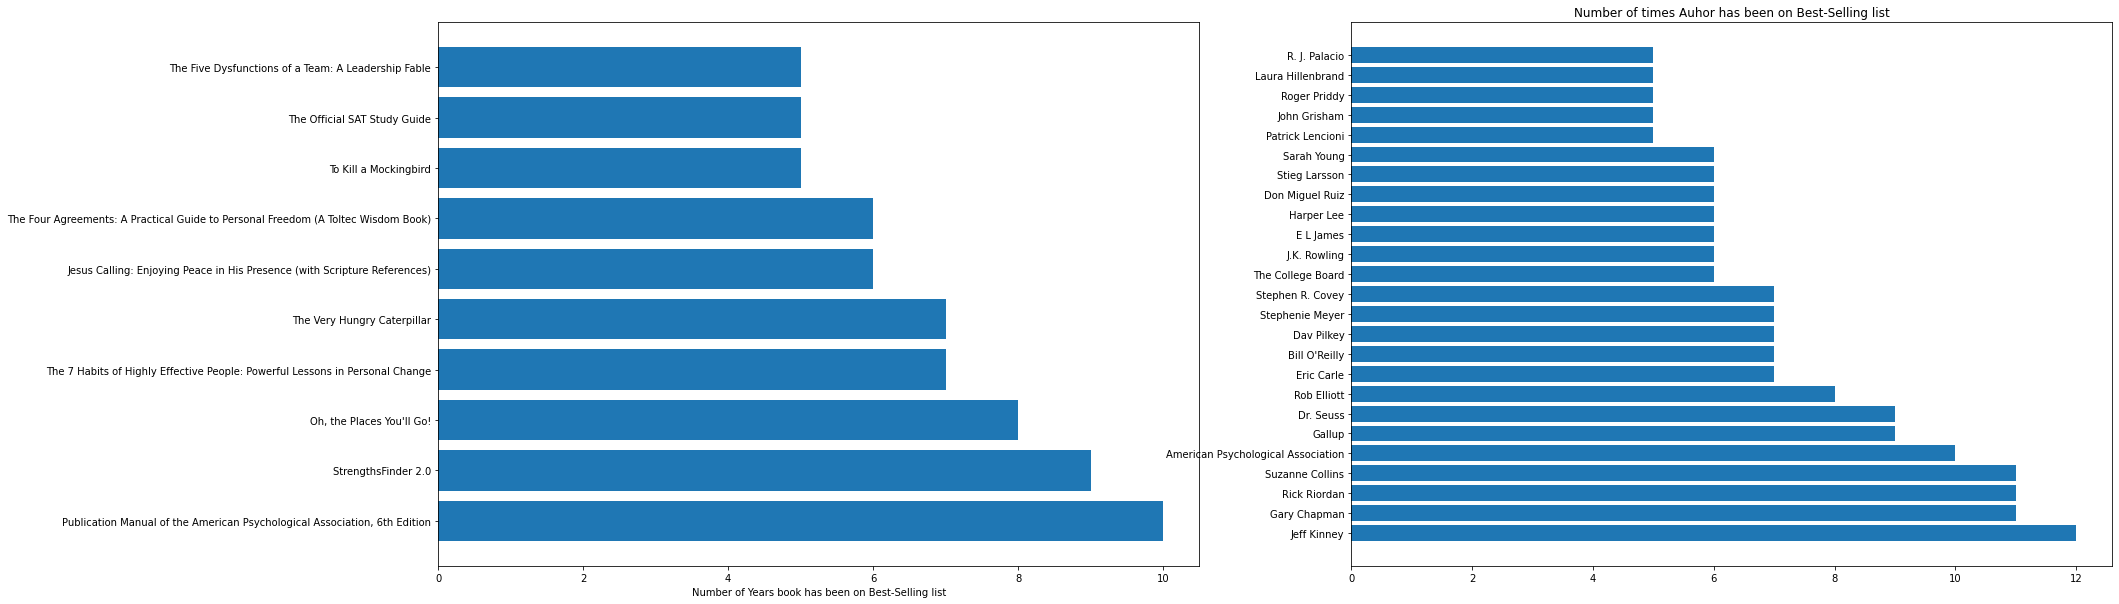

In [10]:
# Summary of Book and Authors
table_book = books['Name'].value_counts()
table_book = table_book.head(10)

table_auth = books['Author'].value_counts()
table_auth = table_auth.head(25)

fig, ax = plt.subplots(1, 2, figsize=(30,10))
# Books
ax[0].barh(y = table_book.index, width = table_book.values)
ax[0].set_xlabel('Number of Years book has been on Best-Selling list')
# Authors
ax[1].barh(y = table_auth.index, width = table_auth.values)
ax[1].set_title('Number of times Auhor has been on Best-Selling list')
plt.show()